Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjusts the configuration of the plots we will create


Read in the Data using Pandas

In [2]:
# Read in the data
df = pd.read_csv(r'D:\DataAanlysis\Databases\portfolio-databases\movies.csv')
# Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Let's see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# Change data type of columns

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 


In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [7]:
# Create correct Year column
df['yearcorrect'] = df['released'].astype(str).str[:4]

In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [9]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False )

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
# Drop any duplicates
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


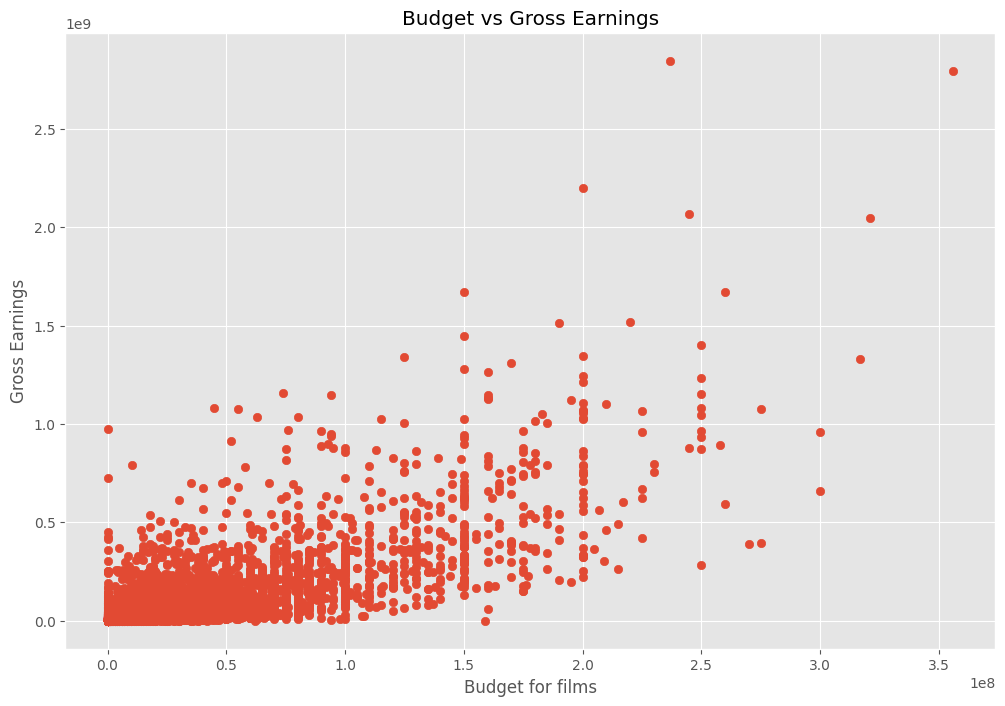

In [12]:
# Budget high correlation
# Company high correlation

# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for films')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

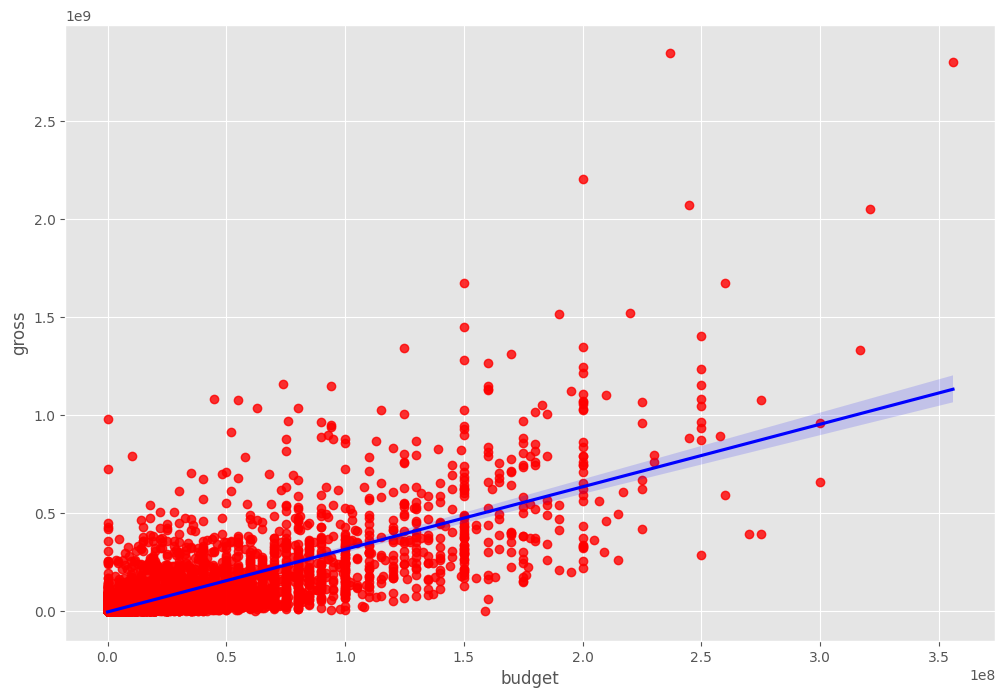

In [13]:
# Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [14]:
# Let's start looking at correlation

df.corr(method='pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


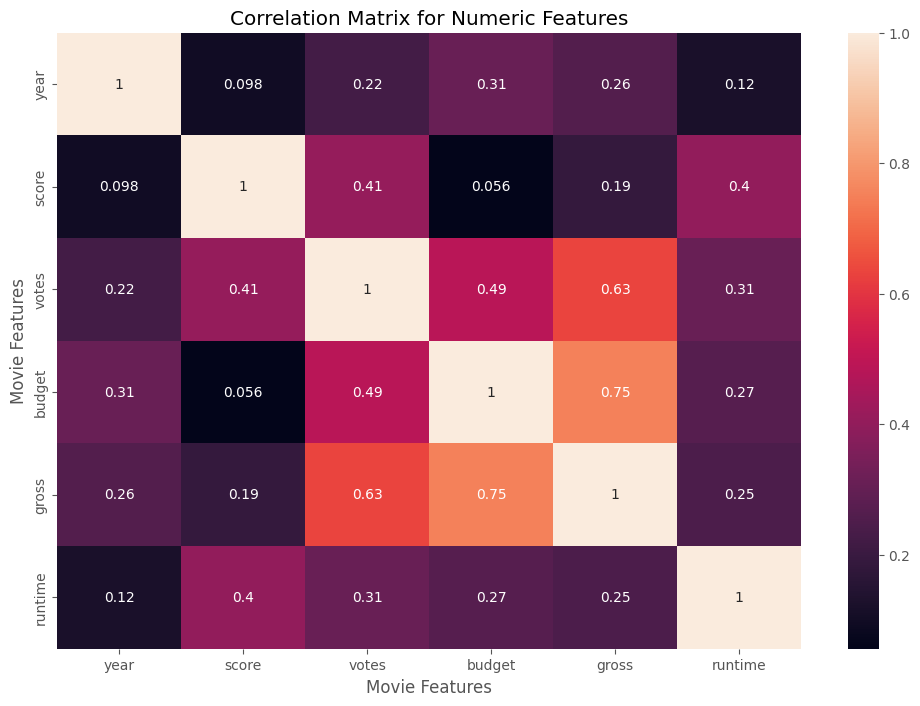

In [15]:
# High correlation between budget and gross

correlation_matrix = df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [16]:
# Change object type column to numeric

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,534,5,0,2009,1833,7.8,1100000.0,1162,1788,2337,55,237000000,2847246203,2254,162.0,30
7445,536,5,0,2019,2428,8.4,903000.0,167,754,2244,55,356000000,2797501328,1606,181.0,40
3045,6897,5,6,1997,1107,7.8,1100000.0,1162,1788,1598,55,200000000,2201647264,2254,194.0,18
6663,5146,5,0,2015,2213,7.8,876000.0,1130,2559,526,55,245000000,2069521700,1541,138.0,36
7244,537,5,0,2018,2360,8.4,897000.0,167,754,2244,55,321000000,2048359754,1606,149.0,39


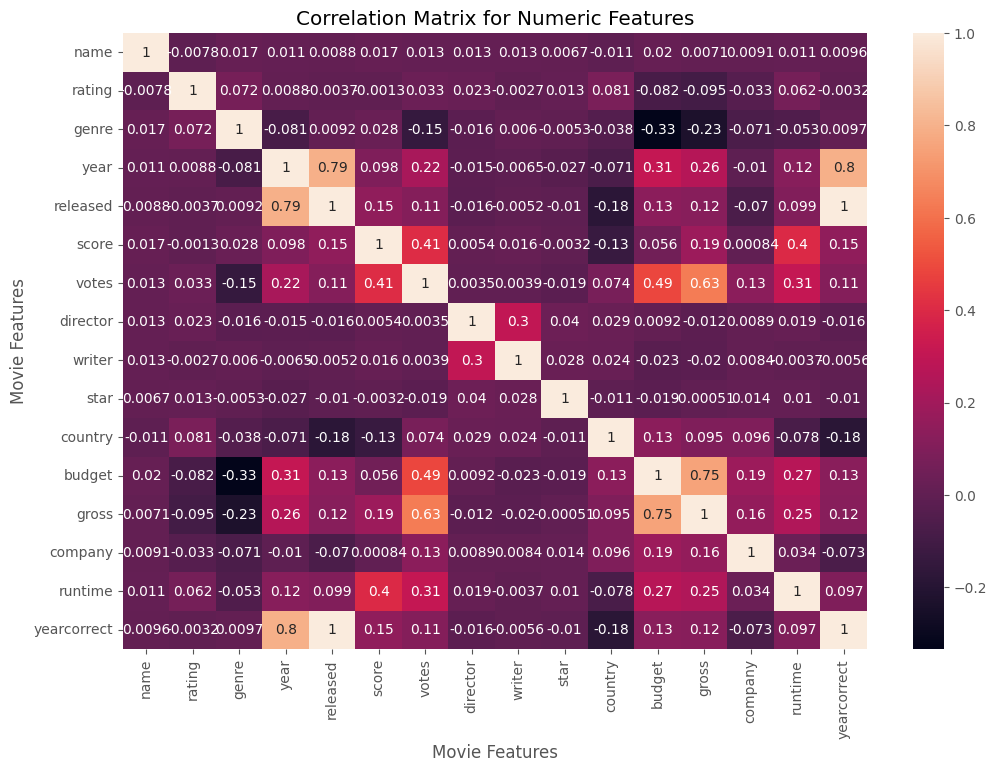

In [17]:
correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [18]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.007816,0.016974,0.011371,0.008790,0.017427,0.012921,0.012970,0.013229,0.006652,-0.010753,0.020201,0.007100,0.009130,0.010855,0.009586
rating,-0.007816,1.000000,0.072423,0.008779,-0.003670,-0.001314,0.033225,0.022545,-0.002722,0.013316,0.081244,-0.081939,-0.095450,-0.033039,0.062145,-0.003192
genre,0.016974,0.072423,1.000000,-0.081261,0.009213,0.027965,-0.145307,-0.016161,0.005993,-0.005311,-0.037615,-0.334021,-0.234297,-0.071138,-0.052711,0.009659
year,0.011371,0.008779,-0.081261,1.000000,0.793450,0.097995,0.222945,-0.015259,-0.006491,-0.026969,-0.070938,0.309212,0.261900,-0.010486,0.120811,0.795493
released,0.008790,-0.003670,0.009213,0.793450,1.000000,0.150115,0.112950,-0.016280,-0.005197,-0.010107,-0.180809,0.132028,0.122863,-0.070399,0.098791,0.997604
score,0.017427,-0.001314,0.027965,0.097995,0.150115,1.000000,0.409182,0.005440,0.016244,-0.003154,-0.133348,0.055665,0.186392,0.000842,0.399451,0.148164
votes,0.012921,0.033225,-0.145307,0.222945,0.112950,0.409182,1.000000,0.003502,0.003888,-0.018782,0.073625,0.486862,0.632834,0.133206,0.309212,0.111865
director,0.012970,0.022545,-0.016161,-0.015259,-0.016280,0.005440,0.003502,1.000000,0.300411,0.039983,0.028725,0.009157,-0.011944,0.008932,0.018803,-0.016103
writer,0.013229,-0.002722,0.005993,-0.006491,-0.005197,0.016244,0.003888,0.300411,1.000000,0.027871,0.023579,-0.022641,-0.019970,0.008420,-0.003740,-0.005574
star,0.006652,0.013316,-0.005311,-0.026969,-0.010107,-0.003154,-0.018782,0.039983,0.027871,1.000000,-0.010825,-0.019002,-0.000514,0.014128,0.010448,-0.010434


In [19]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.007816
             genre          0.016974
             year           0.011371
             released       0.008790
             score          0.017427
             votes          0.012921
             director       0.012970
             writer         0.013229
             star           0.006652
             country       -0.010753
             budget         0.020201
             gross          0.007100
             company        0.009130
             runtime        0.010855
             yearcorrect    0.009586
rating       name          -0.007816
             rating         1.000000
             genre          0.072423
             year           0.008779
             released      -0.003670
             score         -0.001314
             votes          0.033225
             director       0.022545
             writer        -0.002722
             star           0.013316
             country        0.081244
 

In [20]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
country      yearcorrect   -0.183944
yearcorrect  country       -0.183944
released     country       -0.180809
country      released      -0.180809
votes        genre         -0.145307
genre        votes         -0.145307
country      score         -0.133348
score        country       -0.133348
rating       gross         -0.095450
gross        rating        -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
year         genre         -0.081261
genre        year          -0.081261
country      runtime       -0.078412
runtime      country       -0.078412
company      yearcorrect   -0.072767
yearcorrect  company       -0.072767
genre        company       -0.071138
company      genre         -0.071138
country      year          -0.070938
year         country       -0.070938
released     company       -0.070399
c

In [21]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        gross          0.632834
gross        votes          0.632834
budget       gross          0.750157
gross        budget         0.750157
year         released       0.793450
released     year           0.793450
yearcorrect  year           0.795493
year         yearcorrect    0.795493
released     yearcorrect    0.997604
yearcorrect  released       0.997604
director     director       1.000000
votes        votes          1.000000
released     released       1.000000
score        score          1.000000
rating       rating         1.000000
name         name           1.000000
genre        genre          1.000000
year         year           1.000000
budget       budget         1.000000
country      country        1.000000
writer       writer         1.000000
star         star           1.000000
company      company        1.000000
gross        gross          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64